In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os


In [2]:

df = pd.read_csv('lightcast_job_postings.csv', low_memory=False)

df.head(10)


,ID,LAST_UPDATED_DATE,LAST_UPDATED_TIMESTAMP,DUPLICATES,POSTED,EXPIRED,DURATION,SOURCE_TYPES,SOURCES,URL,...,NAICS_2022_2,NAICS_2022_2_NAME,NAICS_2022_3,NAICS_2022_3_NAME,NAICS_2022_4,NAICS_2022_4_NAME,NAICS_2022_5,NAICS_2022_5_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,1f57d95acf4dc67ed2819eb12f049f6a5c11782c,9/6/2024,2024-09-06 20:32:57.352 Z,0.0,6/2/2024,6/8/2024,6.0,"[\n ""Company""\n]","[\n ""brassring.com""\n]","[\n ""https://sjobs.brassring.com/TGnewUI/Sear...",...,44.0,Retail Trade,441.0,Motor Vehicle and Parts Dealers,4413.0,"Automotive Parts, Accessories, and Tire Retailers",44133.0,Automotive Parts and Accessories Retailers,441330.0,Automotive Parts and Accessories Retailers
1,0cb072af26757b6c4ea9464472a50a443af681ac,8/2/2024,2024-08-02 17:08:58.838 Z,0.0,6/2/2024,8/1/2024,NaN,"[\n ""Job Board""\n]","[\n ""maine.gov""\n]","[\n ""https://joblink.maine.gov/jobs/1085740""\n]",...,56.0,Administrative and Support and Waste Managemen...,561.0,Administrative and Support Services,5613.0,Employment Services,56132.0,Temporary Help Services,561320.0,Temporary Help Services
2,85318b12b3331fa490d32ad014379df01855c557,9/6/2024,2024-09-06 20:32:57.352 Z,1.0,6/2/2024,7/7/2024,35.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/dallas-tx/data-analys...",...,52.0,Finance and Insurance,524.0,Insurance Carriers and Related Activities,5242.0,"Agencies, Brokerages, and Other Insurance Rela...",52429.0,Other Insurance Related Activities,524291.0,Claims Adjusting
3,1b5c3941e54a1889ef4f8ae55b401a550708a310,9/6/2024,2024-09-06 20:32:57.352 Z,1.0,6/2/2024,7/20/2024,48.0,"[\n ""Job Board""\n]","[\n ""disabledperson.com"",\n ""dejobs.org""\n]","[\n ""https://www.disabledperson.com/jobs/5948...",...,52.0,Finance and Insurance,522.0,Credit Intermediation and Related Activities,5221.0,Depository Credit Intermediation,52211.0,Commercial Banking,522110.0,Commercial Banking
4,cb5ca25f02bdf25c13edfede7931508bfd9e858f,6/19/2024,2024-06-19 07:00:00.000 Z,0.0,6/2/2024,6/17/2024,15.0,"[\n ""FreeJobBoard""\n]","[\n ""craigslist.org""\n]","[\n ""https://modesto.craigslist.org/sls/77475...",...,99.0,Unclassified Industry,999.0,Unclassified Industry,9999.0,Unclassified Industry,99999.0,Unclassified Industry,999999.0,Unclassified Industry
5,35a6cd2183d9fb270e3f504b270f36d43cb759a6,9/6/2024,2024-09-06 20:32:57.352 Z,0.0,6/2/2024,6/12/2024,10.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/little-rock-ar/sr-lea...",...,51.0,Information,517.0,Telecommunications,5178.0,All Other Telecommunications,51781.0,All Other Telecommunications,517810.0,All Other Telecommunications
6,06de8d192f30b1d8d3c575d453faf143d332f4d4,8/2/2024,2024-08-02 17:08:58.838 Z,0.0,6/2/2024,8/1/2024,NaN,"[\n ""Company""\n]","[\n ""oraclecloud.com""\n]","[\n ""https://hctz.fa.us2.oraclecloud.com/hcmU...",...,31.0,Manufacturing,334.0,Computer and Electronic Product Manufacturing,3344.0,Semiconductor and Other Electronic Component M...,33441.0,Semiconductor and Other Electronic Component M...,334413.0,Semiconductor and Related Device Manufacturing
7,3d589c9d84677ca9468a5bc82295456e0ce6b13f,9/6/2024,2024-09-06 20:32:57.352 Z,1.0,6/2/2024,7/7/2024,35.0,"[\n ""Job Board""\n]","[\n ""dejobs.org""\n]","[\n ""https://dejobs.org/dayton-oh/data-analys...",...,52.0,Finance and Insurance,524.0,Insurance Carriers and Related Activities,5242.0,"Agencies, Brokerages, and Other Insurance Rela...",52429.0,Other Insurance Related Activities,524291.0,Claims Adjusting
8,5a843df632e1ff756fa19d80a0871262d51becc0,6/21/2024,2024-06-21 07:00:00.000 Z,0.0,6/2/2024,6/20/2024,18.0,"[\n ""Job Board""\n]","[\n ""computerwork.com""\n]","[\n ""http://computerwork.com/us/en/search-job...",...,99.0,Unclassified Industry,999.0,Unclassified Industry,9999.0,Unclassified Industry,99999.0,Unclassified Industry,999999.0,Unclassified Industry
9,229620073766234e814e8add21db7dfaef69b3bd,10/9/2024,2024-10-09 18:07:44.758 Z,0.0,6/2/2024,8/1/2024,NaN,"[\n ""Company""\n]","[\n ""3ds.com""\n]","

In [3]:
# Check all columns in your dataset
print(df.columns.tolist())


['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES', 'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL', 'ACTIVE_URLS', 'ACTIVE_SOURCES_INFO', 'TITLE_RAW', 'BODY', 'MODELED_EXPIRED', 'MODELED_DURATION', 'COMPANY', 'COMPANY_NAME', 'COMPANY_RAW', 'COMPANY_IS_STAFFING', 'EDUCATION_LEVELS', 'EDUCATION_LEVELS_NAME', 'MIN_EDULEVELS', 'MIN_EDULEVELS_NAME', 'MAX_EDULEVELS', 'MAX_EDULEVELS_NAME', 'EMPLOYMENT_TYPE', 'EMPLOYMENT_TYPE_NAME', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'IS_INTERNSHIP', 'SALARY', 'REMOTE_TYPE', 'REMOTE_TYPE_NAME', 'ORIGINAL_PAY_PERIOD', 'SALARY_TO', 'SALARY_FROM', 'LOCATION', 'CITY', 'CITY_NAME', 'COUNTY', 'COUNTY_NAME', 'MSA', 'MSA_NAME', 'STATE', 'STATE_NAME', 'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING', 'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING', 'NAICS2', 'NAICS2_NAME', 'NAICS3', 'NAICS3_NAME', 'NAICS4', 'NAICS4_NAME', 'NAICS5', 'NAICS5_NAME', 'NAICS6', 'NAIC

In [4]:
df = df.copy()
df['SALARY'] = pd.to_numeric(df['SALARY'], errors='coerce')

def tag_ai(row):
    title = str(row['TITLE_NAME']).lower()
    industry = str(row['NAICS_2022_2_NAME']).lower()
    
    if ('ai' in title or 
        'artificial intelligence' in title or 
        'machine learning' in title or 
        'data scientist' in title or 
        'deep learning' in title or
        'nlp' in title or
        'computer vision' in title or
        'robotics' in title or
        'ml' in title or
        'data engineer' in title or
        'ml engineer' in title or
        'scientist' in title or
        ('professional, scientific, and technical services' in industry) or
        ('information' in industry)):  
        return 'AI Career'
    else:
        return 'Non-AI Career'

df['Career_Type'] = df.apply(tag_ai, axis=1)

print(df['Career_Type'].value_counts())


Career_Type
Non-AI Career    44188
AI Career        28310
Name: count, dtype: int64


In [5]:
output_dir = 'DATA'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


<Figure size 1000x600 with 0 Axes>

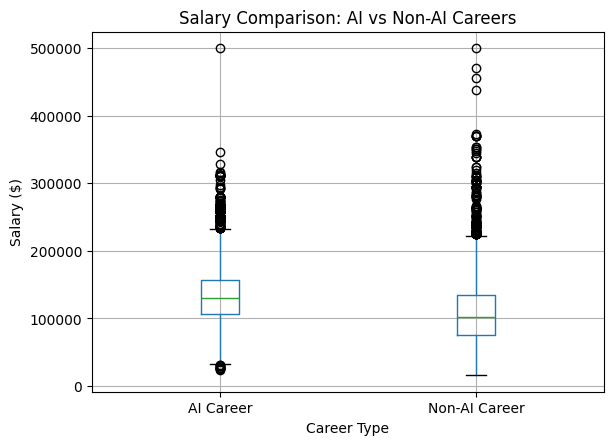

In [6]:
df_salary = df.dropna(subset=['SALARY'])

plt.figure(figsize=(10,6))
df_salary.boxplot(column='SALARY', by='Career_Type')
plt.title('Salary Comparison: AI vs Non-AI Careers')
plt.suptitle('')  # remove default matplotlib subtitle
plt.xlabel('Career Type')
plt.ylabel('Salary ($)')
plt.grid(True)

plot_path = os.path.join(output_dir, 'ai_vs_nonai_salary_comparison.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')


plt.show()

In [7]:
df['SALARY'] = pd.to_numeric(df['SALARY'], errors='coerce')

def tag_ai(row):
    title = str(row['TITLE_NAME']).lower()
    industry = str(row['NAICS_2022_2_NAME']).lower()
    
    if ('ai' in title or 
        'artificial intelligence' in title or 
        'machine learning' in title or 
        'data scientist' in title or 
        'deep learning' in title or
        'nlp' in title or
        'computer vision' in title or
        'robotics' in title or
        'ml' in title or
        'data engineer' in title or
        'ml engineer' in title or
        'scientist' in title or
        ('professional, scientific, and technical services' in industry) or
        ('information' in industry)):
        return 'AI Career'
    else:
        return 'Non-AI Career'

df['Career_Type'] = df.apply(tag_ai, axis=1)

df_salary = df.dropna(subset=['SALARY'])

mean_salary_df = df_salary.groupby('Career_Type')['SALARY'].mean().round(2).reset_index()
mean_salary_df.columns = ['Career_Type', 'Mean_Salary ($)']
mean_salary_df

,Career_Type,Mean_Salary ($)
0,AI Career,133344.66
1,Non-AI Career,108512.87


In [8]:
df['SALARY'] = pd.to_numeric(df['SALARY'], errors='coerce')

# Drop rows with missing salary
df_salary = df.dropna(subset=['SALARY'])

# Group by career type and compute all key stats
summary_stats = df_salary.groupby('Career_Type')['SALARY'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).round(2)

# Rename columns for display
summary_stats = summary_stats.rename(columns={
    'count': 'Valid Salary Entries',
    'mean': 'Mean Salary ($)',
    'median': 'Median Salary ($)',
    'min': 'Minimum Salary ($)',
    'max': 'Maximum Salary ($)',
    'std': 'Standard Deviation ($)'
})

# Add total job counts manually (from earlier classification)
summary_stats['Job Postings Count'] = [28310 if i == 'AI Career' else 44188 for i in summary_stats.index]

# Reorder columns
summary_stats = summary_stats[['Job Postings Count', 'Valid Salary Entries', 'Mean Salary ($)',
                               'Median Salary ($)', 'Minimum Salary ($)', 'Maximum Salary ($)',
                               'Standard Deviation ($)']]

summary_stats_path = os.path.join(output_dir, 'ai_vs_nonai_salary_summary.csv')
summary_stats.to_csv(summary_stats_path)

# Display the final table
summary_stats 



,Job Postings Count,Valid Salary Entries,Mean Salary ($),Median Salary ($),Minimum Salary ($),Maximum Salary ($),Standard Deviation ($)
Career_Type,,,,,,,
AI Career,28310,11713,133344.66,130500.0,23585.0,500000.0,43401.01
Non-AI Career,44188,19095,108512.87,102500.0,15860.0,500000.0,43552.64


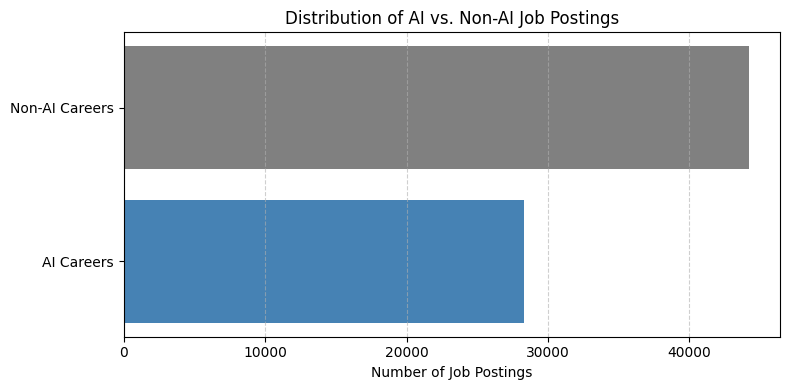

In [9]:
import matplotlib.pyplot as plt

# Job count
job_counts = {'AI Careers': 28310, 'Non-AI Careers': 44188}

# Plot
plt.figure(figsize=(8, 4))
plt.barh(list(job_counts.keys()), list(job_counts.values()), color=['steelblue', 'gray'])
plt.xlabel("Number of Job Postings")
plt.title("Distribution of AI vs. Non-AI Job Postings")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save (optional)
plt.savefig("DATA/job_distribution_bar_chart.png", dpi=300, bbox_inches='tight')
plt.show()

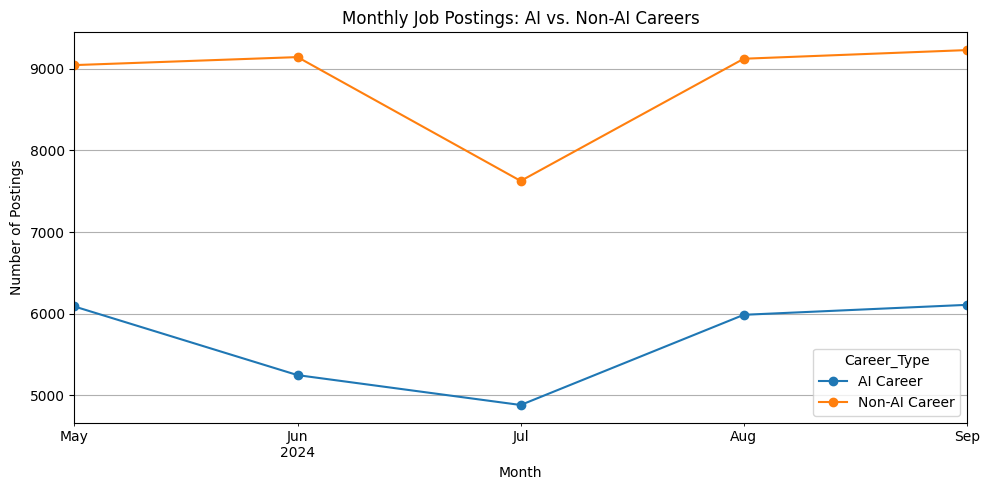

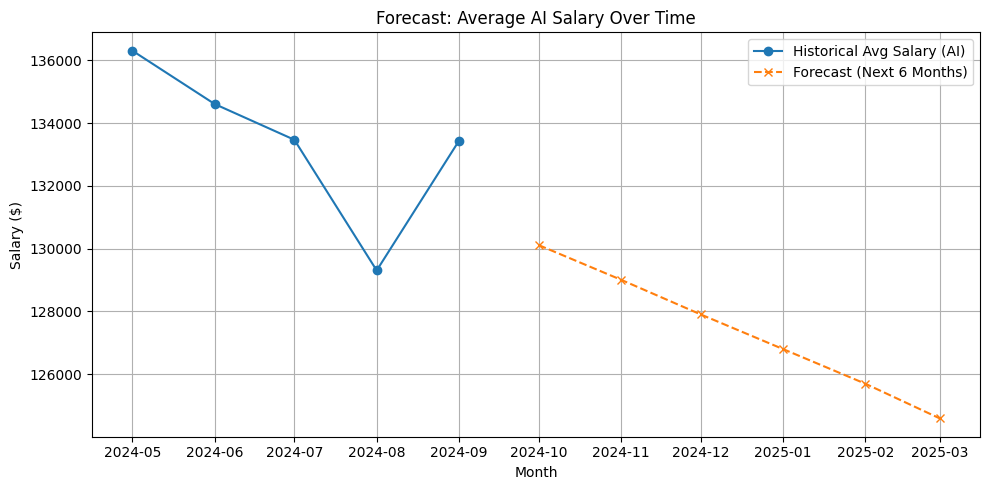

In [14]:
df['POSTED'] = pd.to_datetime(df['POSTED'], errors='coerce')
df['SALARY'] = pd.to_numeric(df['SALARY'], errors='coerce')

# Define AI career tagging function
def tag_ai(row):
    title = str(row['TITLE_NAME']).lower()
    industry = str(row['NAICS_2022_2_NAME']).lower()
    if ('ai' in title or 'artificial intelligence' in title or 'machine learning' in title or
        'data scientist' in title or 'deep learning' in title or 'nlp' in title or
        'computer vision' in title or 'robotics' in title or 'ml' in title or
        'data engineer' in title or 'ml engineer' in title or 'scientist' in title or
        'professional, scientific, and technical services' in industry or 'information' in industry):
        return 'AI Career'
    else:
        return 'Non-AI Career'

df['Career_Type'] = df.apply(tag_ai, axis=1)

# Forecast 1: Monthly job postings count (AI vs Non-AI)
df_valid = df.dropna(subset=['POSTED'])
monthly_counts = df_valid.groupby([df_valid['POSTED'].dt.to_period('M'), 'Career_Type']) \
                         .size().unstack().fillna(0)
monthly_counts.index = monthly_counts.index.to_timestamp()

# Plot job posting trends
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Monthly Job Postings: AI vs. Non-AI Careers")
plt.ylabel("Number of Postings")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
job_postings_path = "DATA/monthly_job_postings_forecast.png"
plt.savefig(job_postings_path, dpi=300)
plt.show()

# Forecast 2: Average salary for AI jobs over time
df_ai = df[(df['Career_Type'] == 'AI Career') & (~df['SALARY'].isna())]
monthly_salary = df_ai.groupby(df_ai['POSTED'].dt.to_period('M'))['SALARY'].mean().dropna()
monthly_salary.index = monthly_salary.index.to_timestamp()

# Build simple linear regression model for forecasting
X = sm.add_constant(range(len(monthly_salary)))
y = monthly_salary.values
model = sm.OLS(y, X).fit()

# Forecast next 6 months
future_periods = 6
future_X = sm.add_constant(range(len(monthly_salary), len(monthly_salary) + future_periods))
forecast = model.predict(future_X)

# Create future dates
last_date = monthly_salary.index[-1]
future_dates = [last_date + pd.DateOffset(months=i+1) for i in range(future_periods)]

# Plot actual and forecasted salaries
plt.figure(figsize=(10, 5))
plt.plot(monthly_salary.index, monthly_salary.values, marker='o', label='Historical Avg Salary (AI)')
plt.plot(future_dates, forecast, marker='x', linestyle='--', label='Forecast (Next 6 Months)')
plt.title("Forecast: Average AI Salary Over Time")
plt.ylabel("Salary ($)")
plt.xlabel("Month")
plt.grid(True)
plt.legend()
plt.tight_layout()
salary_forecast_path = "DATA/ai_salary_forecast.png"
plt.savefig(salary_forecast_path, dpi=300)
plt.show()
